In [2]:
import pandas as pd
import numpy as np
from MAG_network import CitationNetwork

from matplotlib import pyplot as plt

import sys

sys.path.insert(0,"/home/laal/MAG/CentralityFairness/Evaluations")

from Evaluations.Evaluator import Evaluator


plt.style.use('ggplot')

/home/laal/MAG/CentralityFairness/Evaluations/lenskit/util.py:45: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  @jitclass([


In [3]:
econ_centrality = pd.read_csv("/home/laal/MAG/DATA/NETWORKS/SimpleWeightEconomics2020CentralityGendered.csv", 
                              sep="\t").query("Gender != -1")
psych_centrality = pd.read_csv("/home/laal/MAG/DATA/NETWORKS/SimpleWeightPsychology2020CentralityGendered.csv", 
                              sep="\t").query("Gender != -1")

In [3]:
METRICS = ['rND']
CENTRALITIES = ['PageRank', 'PageRank05', 'InDegreeStrength', 'Rank']
cutpoint = 1000
    
def evaluate(centrality, data):
    eval = Evaluator(centrality=centrality, data=data)
    return eval.run_evaluations(METRICS)

In [4]:
score_records_econ = []
score_records_psych = []


for samplen in range(20000, econ_centrality.shape[0], 20000):
    scores_econ = evaluate('PageRank', econ_centrality.sample(samplen, random_state=samplen))
    score_records_econ.append(scores_econ)
    
    scores_psych = evaluate('PageRank', psych_centrality.sample(samplen, random_state=samplen))
    score_records_psych.append(scores_psych)
    
econ_scores = pd.DataFrame.from_records(score_records_econ)
psych_scores = pd.DataFrame.from_records(score_records_psych)

gender counts normalized:
1    0.7274
0    0.2726
Name: Gender, dtype: float64
gender counts:
1    14548
0     5452
Name: Gender, dtype: int64
sorted data.head():
              item      rank  PageRank05  InDegreeStrength  InDegree  \
760842  2397423007  0.001323    0.000483         33472.990   24635.0   
335001  2099607353  0.000858    0.000280         12258.514   12545.0   
422325  1970476475  0.000748    0.000344         25434.830   26085.0   
133206   621481202  0.000544    0.000231          8662.692    8800.0   
205359  2187985802  0.000509    0.000226          7085.694    8056.0   

        OutDegreeStrength  OutDegree  Gender   Rank  protected  
760842         4898.27440     1682.0       1  11754          0  
335001          947.90753      656.0       1  12087          0  
422325         5402.52100     3400.0       1  11959          0  
133206          955.72620      585.0       1  12753          0  
205359            0.00000        0.0       1  13121          0  
gender counts 

gender counts normalized:
1    0.50042
0    0.49958
Name: Gender, dtype: float64
gender counts:
1    50042
0    49958
Name: Gender, dtype: int64
sorted data.head():
               item      rank  PageRank05  InDegreeStrength  InDegree  \
1813673  2132289742  0.000860    0.000515         77976.390  155403.0   
1975234  2116067072  0.000502    0.000239         35619.027  107652.0   
164460    182094527  0.000289    0.000141         23576.057   44515.0   
1887623  2022872097  0.000285    0.000183         20053.947   27887.0   
2058547  2131203610  0.000263    0.000126         28869.295   47503.0   

         OutDegreeStrength  OutDegree  Gender   Rank  protected  
1813673          217.08562     1378.0       0  11958          1  
1975234         3024.47100     9136.0       1  11410          0  
164460          1392.47010     4293.0       1  12472          0  
1887623            8.00000       12.0       1  11861          0  
2058547         5146.71630     7204.0       1  12406          0  


gender counts normalized:
1    0.73163
0    0.26837
Name: Gender, dtype: float64
gender counts:
1    146326
0     53674
Name: Gender, dtype: int64
sorted data.head():
              item      rank  PageRank05  InDegreeStrength  InDegree  \
808030  2585687038  0.002848    0.001074         44397.887   48749.0   
891971  2293679170  0.002441    0.000881         43244.740   35847.0   
996923  1958827600  0.001915    0.000782         27164.512   24704.0   
46685   2084647615  0.001912    0.000606         22031.613   14903.0   
598573  1830319489  0.001880    0.000621         17022.695   14754.0   

        OutDegreeStrength  OutDegree  Gender   Rank  protected  
808030        6732.381000     3392.0       1  10983          0  
891971        1549.183700     1183.0       1  11693          0  
996923        1217.824100      696.0       1  11898          0  
46685         2758.624000     1129.0       1  11989          0  
598573           7.051282       19.0       1  12009          0  
gender cou

gender counts normalized:
0    0.501039
1    0.498961
Name: Gender, dtype: float64
gender counts:
0    140291
1    139709
Name: Gender, dtype: int64
sorted data.head():
               item      rank  PageRank05  InDegreeStrength  InDegree  \
3763910   968460832  0.001018    0.000380        27439.4360   25730.0   
1813673  2132289742  0.000860    0.000515        77976.3900  155403.0   
662996   2026186952  0.000480    0.000187        15915.1875   32916.0   
2050708  2010940812  0.000453    0.000198        18596.5310   27629.0   
918812   2166335463  0.000387    0.000249        53204.3100   92004.0   

         OutDegreeStrength  OutDegree  Gender   Rank  protected  
3763910            3.20000       17.0       1  11308          0  
1813673          217.08562     1378.0       0  11958          1  
662996           419.33334      569.0       1  12640          0  
2050708          477.33334      483.0       1  12448          0  
918812          5600.02340    11737.0       1  11680          

gender counts normalized:
1    0.731882
0    0.268118
Name: Gender, dtype: float64
gender counts:
1    278115
0    101885
Name: Gender, dtype: int64
sorted data.head():
              item      rank  PageRank05  InDegreeStrength  InDegree  \
886724  2023750619  0.003138    0.001331         54051.016   49020.0   
808030  2585687038  0.002848    0.001074         44397.887   48749.0   
597974   548446481  0.002642    0.001086         59673.320   40820.0   
891971  2293679170  0.002441    0.000881         43244.740   35847.0   
466005  1777097624  0.002425    0.000825         23844.074   22102.0   

        OutDegreeStrength  OutDegree  Gender   Rank  protected  
886724          1517.5000      748.0       1  10911          0  
808030          6732.3810     3392.0       1  10983          0  
597974          2469.8027     1093.0       1  11378          0  
891971          1549.1837     1183.0       1  11693          0  
466005           874.0000      471.0       1  11660          0  
gender c

In [5]:
econ_global = evaluate('PageRank', econ_centrality)
psych_global = evaluate('PageRank', psych_centrality)

gender counts normalized:
1    0.732121
0    0.267879
Name: Gender, dtype: float64
gender counts:
1    304369
0    111367
Name: Gender, dtype: int64
sorted data.head():
              item      rank  PageRank05  InDegreeStrength  InDegree  \
886724  2023750619  0.003138    0.001331         54051.016   49020.0   
808030  2585687038  0.002848    0.001074         44397.887   48749.0   
597974   548446481  0.002642    0.001086         59673.320   40820.0   
891971  2293679170  0.002441    0.000881         43244.740   35847.0   
466005  1777097624  0.002425    0.000825         23844.074   22102.0   

        OutDegreeStrength  OutDegree  Gender   Rank  protected  
886724          1517.5000      748.0       1  10911          0  
808030          6732.3810     3392.0       1  10983          0  
597974          2469.8027     1093.0       1  11378          0  
891971          1549.1837     1183.0       1  11693          0  
466005           874.0000      471.0       1  11660          0  
gender c

In [4]:
colors = {
    'Psychology': '#617be3',
    'Chemistry' : '#27496d',
    'Mathematics': '#007580',
    'Economics': '#e8505b' # '#fed049'
}

In [5]:
global_rates_econ = [0.1170, 0.1168, 0.1159]
global_rates_psych = [0.1100, 0.1099, 0.1093]

/home/laal/.conda/envs/magenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/laal/.conda/envs/magenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/laal/.conda/envs/magenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/laal/.conda/envs/magenv/lib/python3.8/site-packages/pandas/plotting

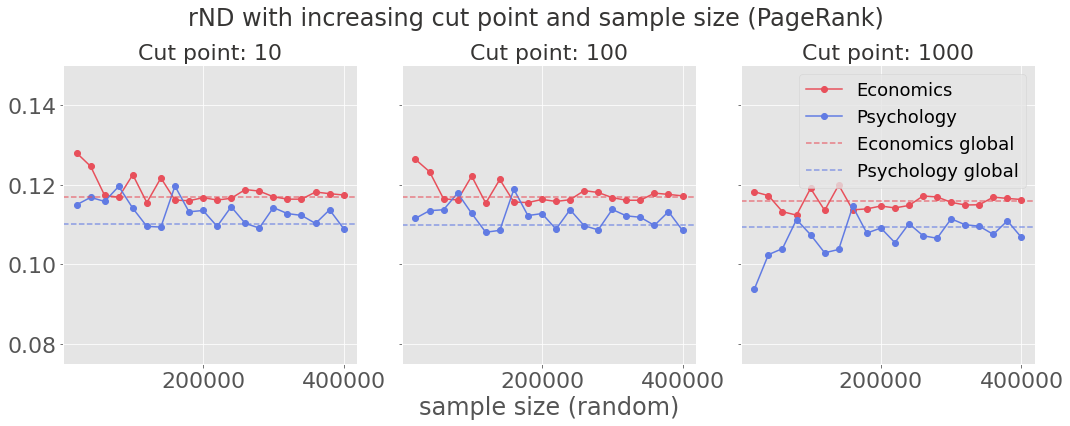

In [6]:
idx = 0
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,6), sharex=False, sharey=True)
axs = list(axs.flatten())
labelsize = 16

for _, cut in enumerate([10, 100, 1000]):
    
    econ_scores = pd.read_csv("/home/laal/MAG/CentralityFairness/METRICS/economics_scores_cutpoint_{}.csv".format(cut))
    psych_scores = pd.read_csv("/home/laal/MAG/CentralityFairness/METRICS/psychology_scores_cutpoint_{}.csv".format(cut))
    
    econ_scores.index = list(range(20000, econ_centrality.shape[0], 20000))
    psych_scores.index = list(range(20000, econ_centrality.shape[0], 20000))

    econ_scores['rND'].plot(style='-o', label="Economics", color=colors['Economics'], ax=axs[idx])
    psych_scores['rND'].plot(style='-o', label="Psychology", color=colors['Psychology'], ax=axs[idx])

    
    
    axs[idx].axhline(y=global_rates_econ[idx], label="Economics global", linestyle='--', alpha=0.7, color=colors['Economics'])
    axs[idx].axhline(y=global_rates_psych[idx], label="Psychology global", linestyle='--', alpha=0.7, color=colors['Psychology'])

    axs[idx].set_title("Cut point: {}".format(cut), fontsize=labelsize + 6, color='#363534')
    

    
    axs[idx].tick_params(axis='x', labelsize=labelsize + 6, rotation=0)
    axs[idx].tick_params(axis='y', labelsize=labelsize + 6)
    
    if idx == 2:
        axs[idx].legend(fontsize=18)
        
    if idx == 1:
        axs[idx].set_xlabel("sample size (random)", fontsize=24)
    
    idx += 1
    
    
plt.ylim(0.075, 0.15)
plt.suptitle("rND with increasing cut point and sample size (PageRank)", color='#363534', fontsize=24)
    
plt.tight_layout()


plt.show()

In [ ]:
plt.title("rND with increasing sample sizes (PageRank).".format(cutpoint),
         fontsize=14, color='#363534')
plt.ylabel('rND')
plt.xlabel("Sample size")
plt.legend()
plt.savefig("rnd_sample_sizes_cutpoint_{}.png".format(cutpoint))